This is an introduction to evolutionary computation in Python with NumPy.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rdm

In [3]:
class Mutation:
    def __init__(self, value, fit):
        self.value = value
        self.fit = fit

    def __gt__(self, mutation2):
        return self.fit > mutation2.fit

    def __str__(self):
        return "Mutation-Fitness: " + str(self.fit)

def sphere(value):
    return np.dot(value.T, value)

def crossover(parent1, parent2):
    return (parent1.value + parent2.value) / 2


In [4]:
n = 5
x = 2 * np.ones(n)

The first generation is: Mutation-Fitness: 34.72848552158641, Mutation-Fitness: 37.43125766391103, Mutation-Fitness: 25.714000498863655, Mutation-Fitness: 17.003064100195587, Mutation-Fitness: 9.85941101879277, Mutation-Fitness: 24.255963164118675, Mutation-Fitness: 26.142567914214204, Mutation-Fitness: 33.67995131793862, Mutation-Fitness: 20.650720092416925, Mutation-Fitness: 11.836260639715423, Mutation-Fitness: 29.25862980769941, Mutation-Fitness: 28.18448364904328, Mutation-Fitness: 17.801196270185965, Mutation-Fitness: 31.780037217359357, Mutation-Fitness: 17.553459357885618, Mutation-Fitness: 37.47831737432007, Mutation-Fitness: 35.33358972219592, Mutation-Fitness: 32.01334069546934, Mutation-Fitness: 13.167617482928721



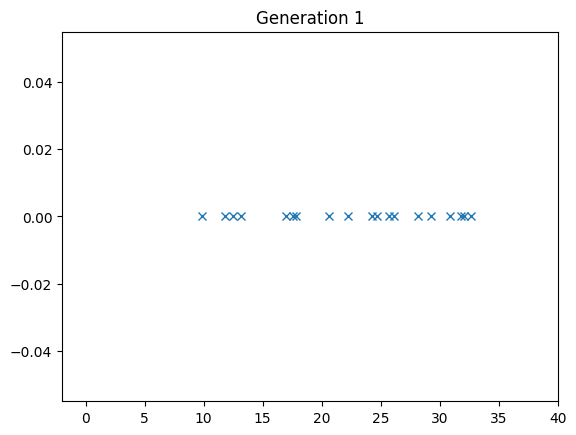

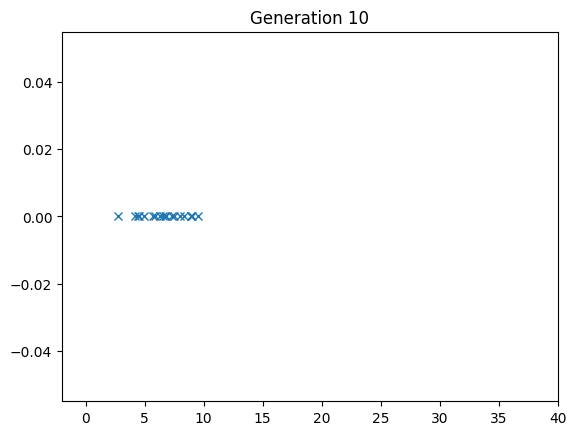

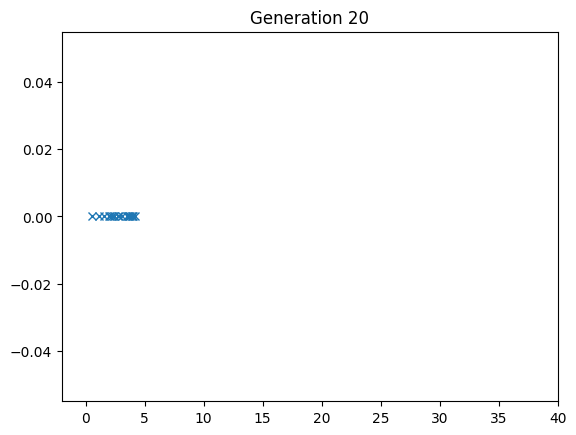

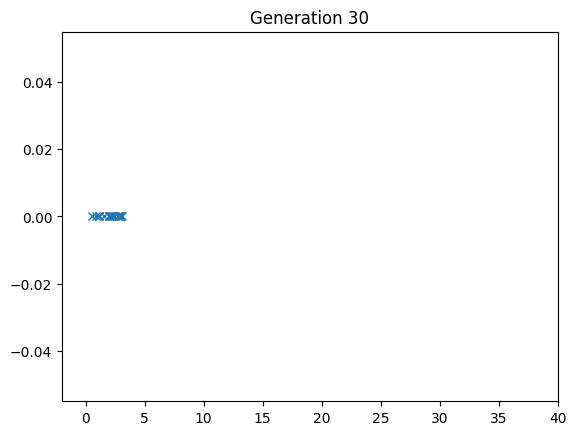

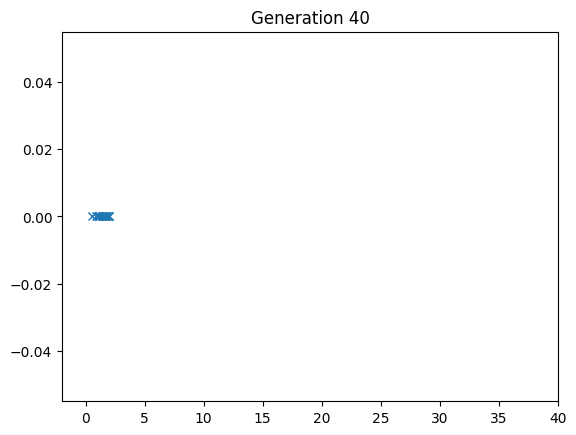

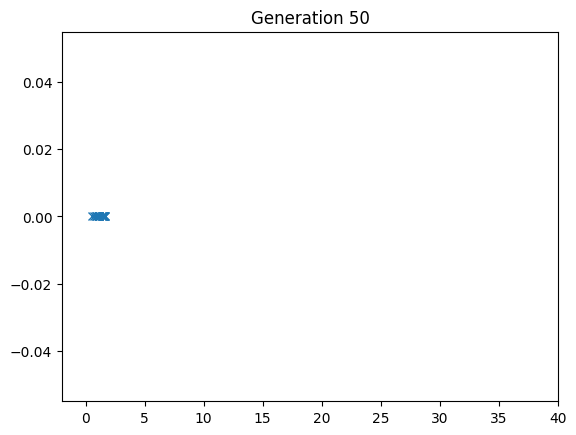

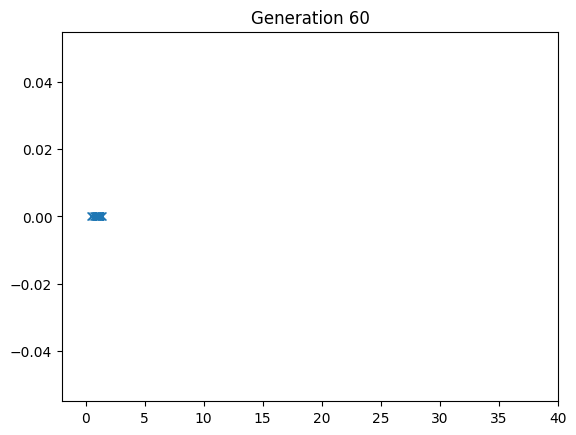

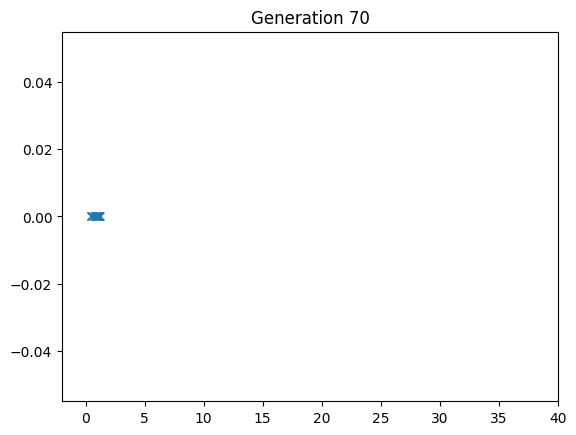

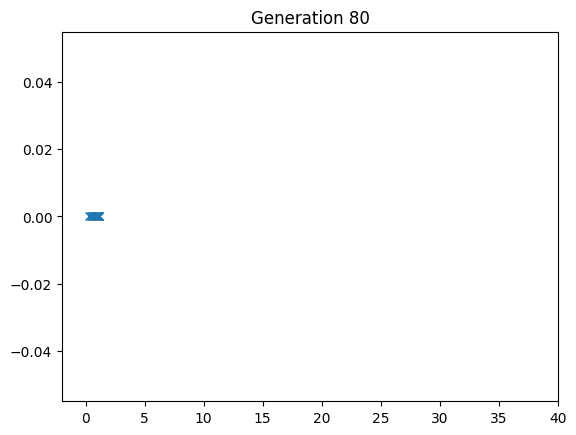

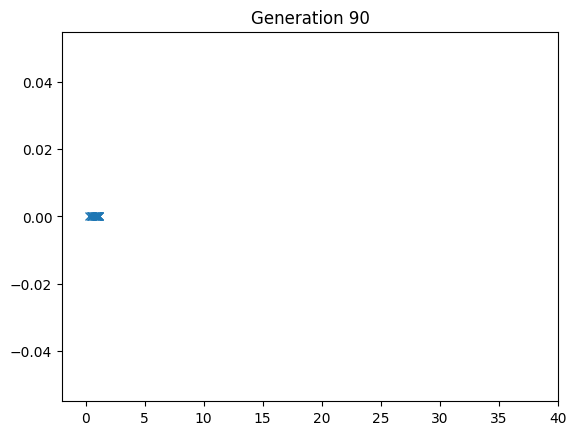

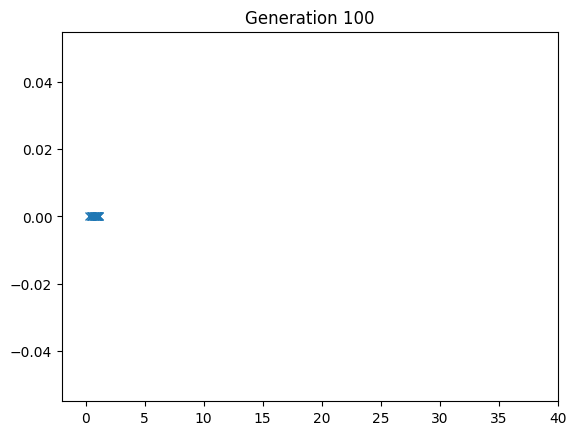

The last generation is: Mutation-Fitness: 0.3288687363032958, Mutation-Fitness: 0.4317729822128808, Mutation-Fitness: 0.4349384590341386, Mutation-Fitness: 0.5384892160990195, Mutation-Fitness: 0.5744293927099798, Mutation-Fitness: 0.6722482715656197, Mutation-Fitness: 0.7366031067207002, Mutation-Fitness: 0.7490179352736822, Mutation-Fitness: 0.7951115874796275, Mutation-Fitness: 0.83980805558371, Mutation-Fitness: 0.8765763456572162, Mutation-Fitness: 0.9356888167551559, Mutation-Fitness: 0.9532974864064587, Mutation-Fitness: 0.9880852397190119, Mutation-Fitness: 0.9924083483350759, Mutation-Fitness: 1.0120113909250332, Mutation-Fitness: 1.074475176065469, Mutation-Fitness: 1.1066767339443582, Mutation-Fitness: 1.108609514472926


In [5]:
generation = 1
sigma = 1.0
parents_mue = 20
mutations_lambda = 10
population = []

# Generate initial mue parents for population
for i in range(1, parents_mue):
    x_ = x + sigma * np.random.randn(n)
    fitness = sphere(x_)

    mutation = Mutation(x_, fitness)
    population.append(mutation)
print("The first generation is:", ", ".join([str(m) for m in population]))
print()

# Compute 100 generations
while generation <= 100:
    # Crossover with 2 parents (p=2) and intermediate recombination by mean value (repeat for lambda number of mutations)
    for i in range(1, mutations_lambda):
        first_parent = rdm.randrange(len(population))
        second_parent = rdm.randrange(len(population))
        mean_value = crossover(population[first_parent], population[second_parent])
        # Mutation
        mean_value_ = mean_value + sigma * np.random.randn(n)
        fitness_ = sphere(mean_value_)

        mutation = Mutation(mean_value_, fitness_)
        population.append(mutation)

    # Now select the best (minimal) mue parents/mutations out of complete population (parent + mutations)
    population.sort()
    population = population[:parents_mue - 1]

    # Show actual distribution of fitness among population
    if generation == 1 or generation % 10 == 0:
        plt.plot([p.fit for p in population], np.zeros_like(population), 'x')
        plt.xlim(-2, 40)
        plt.title('Generation ' + str(generation))
        plt.show()

    generation += 1

# Return the last generation
print("The last generation is:", ", ".join([str(m) for m in population]))